This is the final file of this submission. It is *divided into 2 sections*, firsly in "Analyzing sleep data" I go through the sleep_stages.csv dataset we collected and refined and I analyze various trends and patterns in it.

Then in the second part, titled "Analyzing relation between sleep and habits" I analyze the trends and correlations in the sleep data with respect to the habits and activities datasets we gathered.

## Analyzing sleep data:

### Is there any trend in sleep duration?:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = './processed_data/sleep_cycles.csv'
data = pd.read_csv(file_path)

# Calculate total sleep
data['Total_Sleep'] = data[['Core', 'Deep', 'REM']].sum(axis=1)





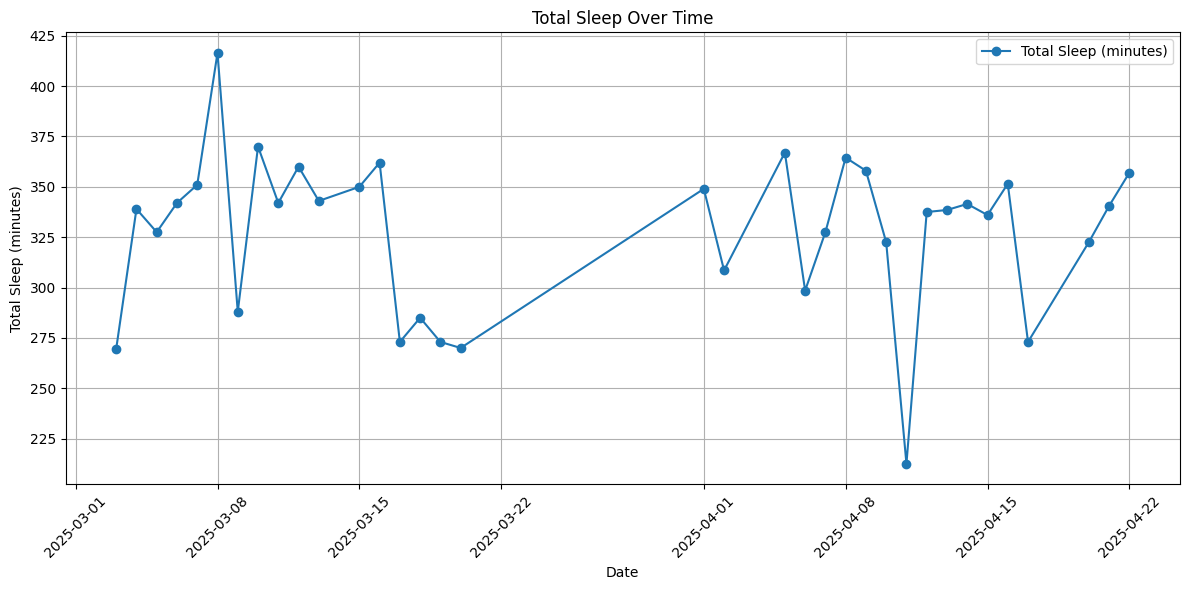

In [3]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Plot total sleep vs. dates
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['Total_Sleep'], marker='o', label='Total Sleep (minutes)')
plt.title('Total Sleep Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sleep (minutes)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

there seems to be no specific trend in the total duration of sleep, with most of the values oscilating between 300 and 375 minutes

### How does the proportion of the sleep stages look?

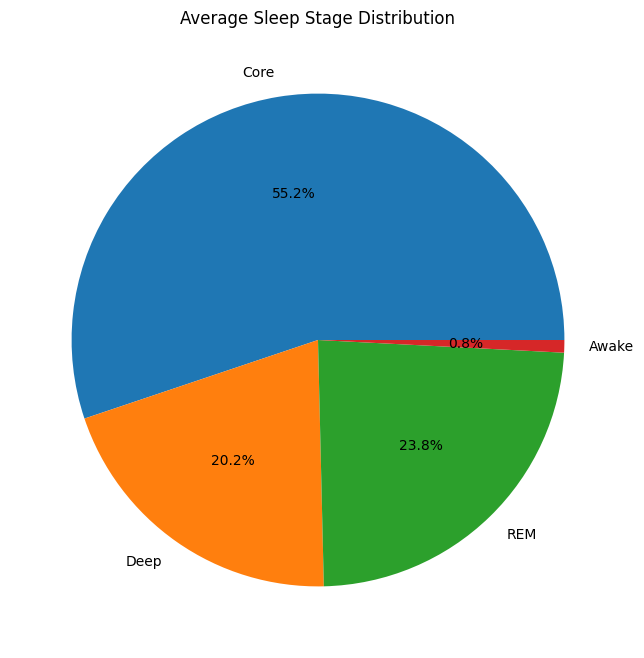

In [4]:
# Calculate average time spent in each stage
stage_means = data[['Core', 'Deep', 'REM', 'Awake']].mean()

# Plot pie chart
stage_means.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Average Sleep Stage Distribution')
plt.ylabel('')
plt.show()

Majority of the night seems to be spent in light/core sleep on average and the DEEP to REM sleep proportions are similar.

### Correlation Heatmap

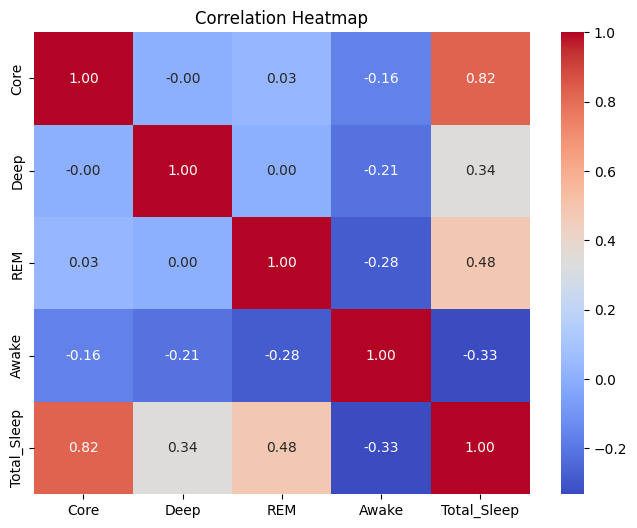

In [5]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = data[['Core', 'Deep', 'REM', 'Awake', 'Total_Sleep']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

there appears to be a strong positive correlation between total sleep and core (light)sleep which makes sense as majority of the night is spent in light sleep.



### Trend of Each Sleep Stage Over Time


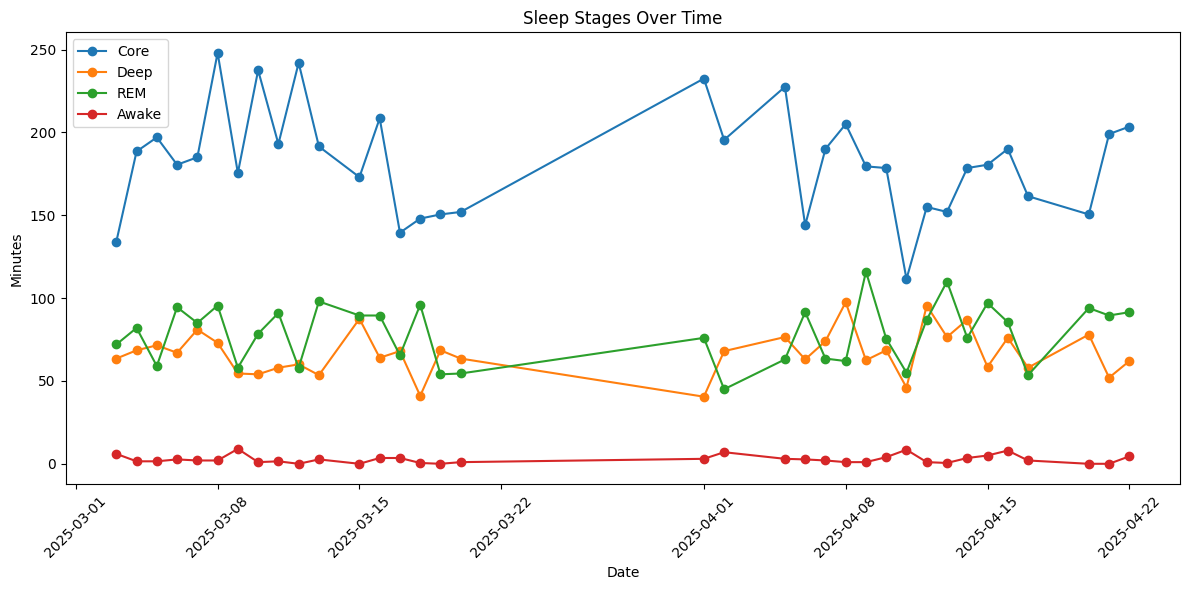

In [6]:
# Plot each sleep stage over time
plt.figure(figsize=(12, 6))
for stage in ['Core', 'Deep', 'REM', 'Awake']:
    plt.plot(data['date'], data[stage], marker='o', label=stage)
plt.title('Sleep Stages Over Time')
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

the pattern of REM sleep seems to follow closely and mimick the pattern of Deep sleep.

### Box plots:

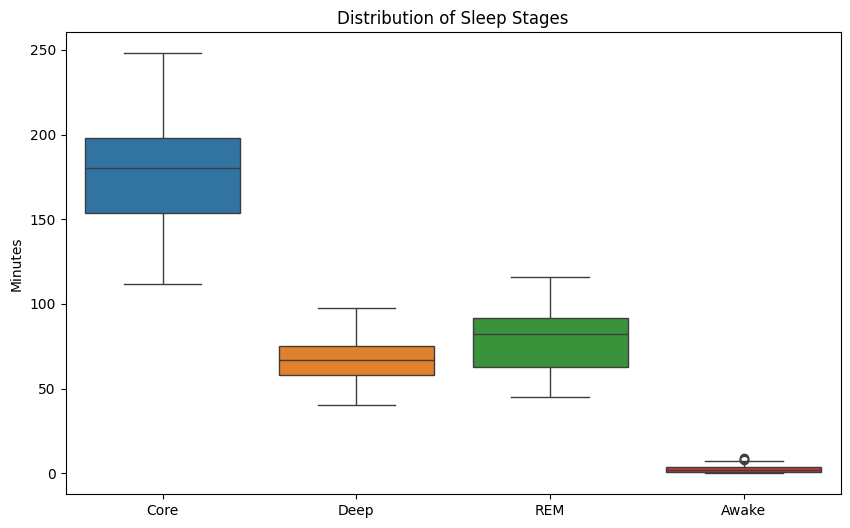

In [7]:
# Plot boxplot for sleep stages
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Core', 'Deep', 'REM', 'Awake']])
plt.title('Distribution of Sleep Stages')
plt.ylabel('Minutes')
plt.show()

### Awake time histogram:

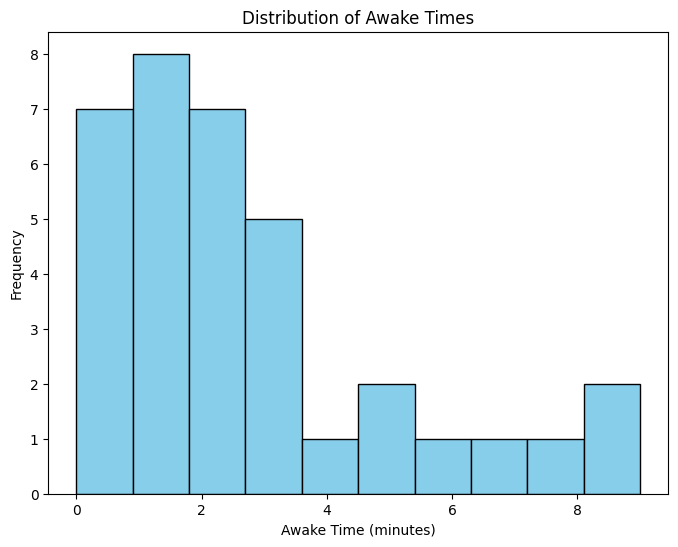

In [8]:
# Plot histogram for awake times
plt.figure(figsize=(8, 6))
plt.hist(data['Awake'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Awake Times')
plt.xlabel('Awake Time (minutes)')
plt.ylabel('Frequency')
plt.show()

from the histogram, it can be deduced that the fewer minutes of wakefulness in the range of 0-4 minutes is more common than the higher values.

### Does the day of the week make a difference?

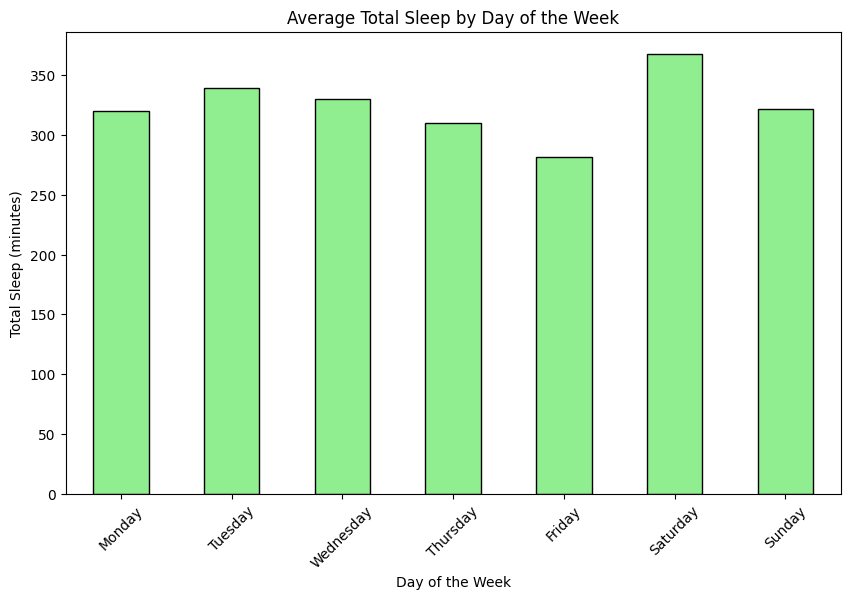

In [9]:
# Ensure 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Check for any invalid dates
if data['date'].isnull().any():
    print("Warning: Some dates could not be converted. Check for invalid values.")

# Add a column for the day of the week
data['Day_of_Week'] = data['date'].dt.day_name()

# Plot average total sleep by day of the week
avg_sleep_by_day = data.groupby('Day_of_Week')['Total_Sleep'].mean()
avg_sleep_by_day = avg_sleep_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

avg_sleep_by_day.plot(kind='bar', figsize=(10, 6), color='lightgreen', edgecolor='black')
plt.title('Average Total Sleep by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sleep (minutes)')
plt.xticks(rotation=45)
plt.show()

As expected, Saturday is slightly higher in sleep duration than the rest, perhaps due to attempting to catch up on sleep after a week of studies.

### Are there any outliers?:

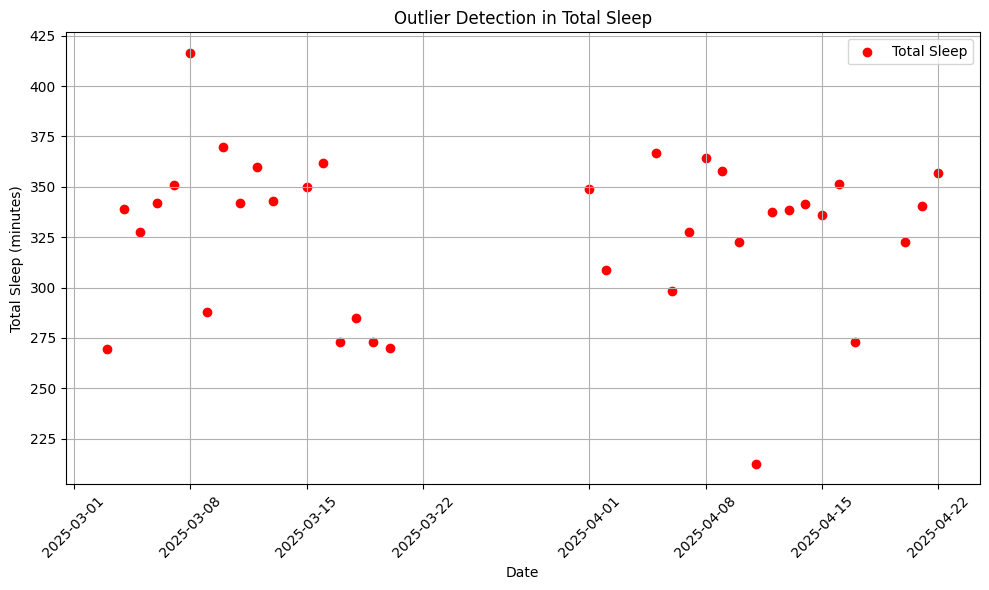

In [10]:
# Scatter plot for total sleep
plt.figure(figsize=(10, 6))
plt.scatter(data['date'], data['Total_Sleep'], color='red', label='Total Sleep')
plt.title('Outlier Detection in Total Sleep')
plt.xlabel('Date')
plt.ylabel('Total Sleep (minutes)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

there seems to be 2 outliers, one is on 2025-03-08 and the other is in 2025-04-11

## Analyzing relation between sleep and habits:

I start off by merging the 2 datasets. We have already organized the sleep cycles dataset nicely where each row corresponds to a date. We also created the same structure for our habits dataset, so merging them is simple and requires just aligning the dates.

Here is the resulting merged dataset, we will use this to make all our visualizations:

In [17]:
sleep_data = pd.read_csv('./processed_data/sleep_cycles.csv')
habits_data = pd.read_csv('./processed_data/processed_habits_data.csv')

# Convert 'date' columns to datetime format
sleep_data['date'] = pd.to_datetime(sleep_data['date'], errors='coerce')
habits_data['Date'] = pd.to_datetime(habits_data['Date'], errors='coerce')

merged_data = sleep_data.merge(habits_data, left_on='date', right_on='Date', how='inner')

merged_data

,date,Core,Deep,REM,Awake,Date,Sugar consumption,Morning sunlight,Afternoon nap,Food before bed,Night time caffeine consumption,Social media usage before bed,Exercise
0,2025-03-13,191.5,53.5,98.0,2.651515,2025-03-13,1,1,1,0,0,1,0
1,2025-03-15,173.0,87.5,89.5,0.000000,2025-03-15,1,0,0,1,0,0,0
2,2025-03-16,208.5,64.0,89.5,3.500000,2025-03-16,1,1,1,0,0,0,1
3,2025-03-17,139.5,68.0,65.5,3.500000,2025-03-17,1,1,1,0,0,0,0
4,2025-03-18,148.0,41.0,96.0,0.500000,2025-03-18,1,1,1,0,0,0,0
5,2025-03-19,150.5,68.5,54.0,0.000000,2025-03-19,1,1,1,0,0,0,0
6,2025-03-20,152.0,63.5,54.5,1.000000,2025-03-20,1,0,0,1,0,0,0
7,2025-04-01,232.5,40.5,76.0,3.000000,2025-04-01,1,0,1,1,0,0,0
8,2025-04-02,195.5,68.0,45.0,7.000000,2025-04-02,1,0,1,1,0,1,0
9,2025-04-05,227.5,76.5,63.0,3.000000,2025-04-05,1,1,1,0,0,0,0


### All habits to sleep quality heatmap:

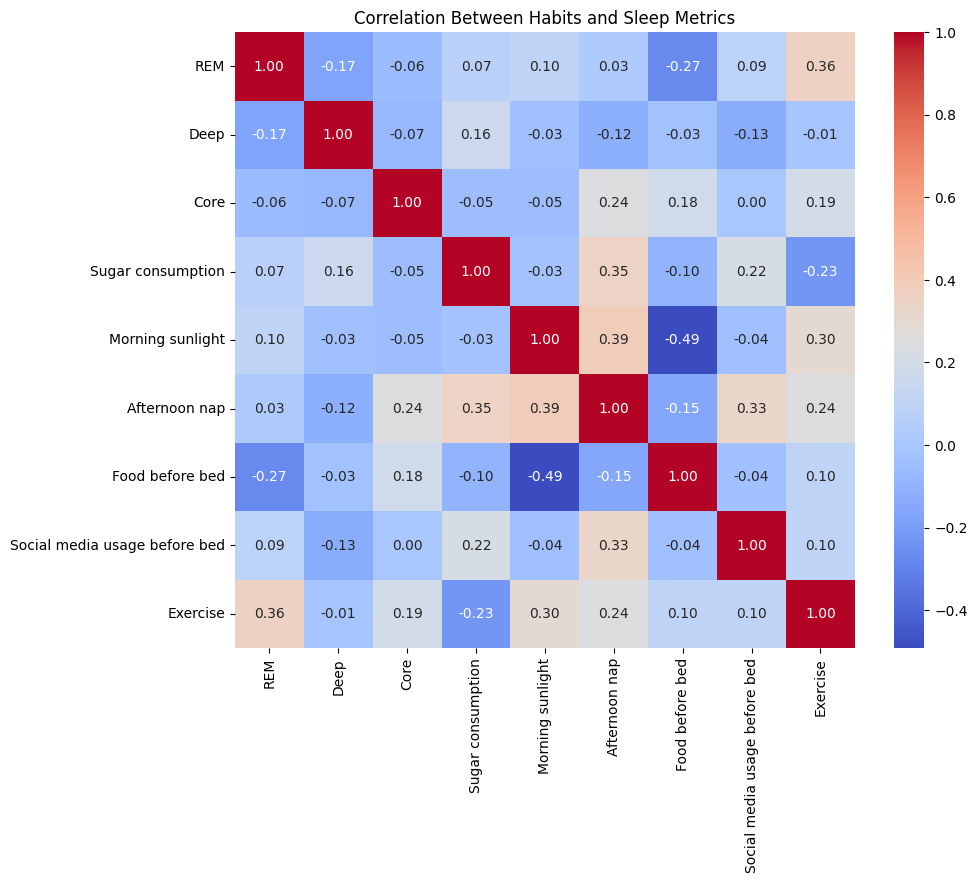

In [23]:
# Select relevant columns
correlation_data = merged_data[['REM', 'Deep', 'Core',  
                                'Sugar consumption', 'Morning sunlight' , 'Afternoon nap', 'Food before bed', 'Social media usage before bed', 'Exercise']]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Habits and Sleep Metrics')
plt.show()

This heatmap illustrates a high level overview of the correlation of the tracked habits to sleep as well as on performing other habits.

Here are the observations I made on the habits that had an effect on sleep, the remaining ones did not show any significant effect hence they are not mentioned.

**Obesrvations:**
1. Exercise and REM sleep have a slight correlation and considering that exercsing was done on a routine and not based on motivation this suggests that the exercise itself indeed had a positive effect on REM sleep and not the other way around.

2. Social media usage before bed and deep sleep has a slight negative correlation.

3. Food before bed also had a negative impact on REM sleep duration, suggesting that eating before bed negatively impact sleep quality.

4. Suprisingly, although this was not something that I was looking for, I notice that morning sunlight had a signficant negative effect on the likelihood of eating close to bedtime. Perhaps this suggests that the earlier onset of wanting to sleep due to seeing sunlight in the morning makes me crave eating close to bed time less.
5. Similar to this, an afternoon nap was more likely to occur if morning sunlight was viewed.




**Hypothesis tests based on observations**

Now that we have deduced the observations on how the data relates to each other it is time to form hypothesis tests to see if these observations are actually true and significant. I am going to form a null and alternate hypothesis for each of the 5 observations:

1. 
    **H0:** Exercise has no effect on REM sleep duration.

    **H1:** Exercise has a significant effect on REM sleep duration.



In [25]:
from scipy.stats import ttest_ind

# Split data based on exercise
exercise_yes = merged_data[merged_data['Exercise'] == 1]['REM']
exercise_no = merged_data[merged_data['Exercise'] == 0]['REM']

# Perform t-test
t_stat, p_value = ttest_ind(exercise_yes, exercise_no, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 1.9025178781500238, P-value: 0.15646880457975051


The p-value is greater than 0.05, hence we fail to reject the null hypothesis. Exercise does not have a statistically significant effect on REM sleep duration.

2. 
    **H0:** Social media usage before bed has no effect on deep sleep duration.

    **H1:** Social media usage before bed has a significant effect on deep sleep duration.



In [26]:
# Split data based on social media usage
social_media_yes = merged_data[merged_data['Social media usage before bed'] == 1]['Deep']
social_media_no = merged_data[merged_data['Social media usage before bed'] == 0]['Deep']

# Perform t-test
t_stat, p_value = ttest_ind(social_media_yes, social_media_no, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -0.8976334233308815, P-value: 0.3828469335430956


The p-value is greater than 0.05, hence we fail to reject the null hypothesis. Social media usage before bed does not have a statistically significant effect on deep sleep duration.

3. 
    **H0:** Food before bed has no effect on REM sleep duration.

    **H1:** Food before bed has a significant effect on REM sleep duration.



In [27]:
# Split data based on food before bed
food_yes = merged_data[merged_data['Food before bed'] == 1]['REM']
food_no = merged_data[merged_data['Food before bed'] == 0]['REM']

# Perform t-test
t_stat, p_value = ttest_ind(food_yes, food_no, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -1.2590849122470467, P-value: 0.2513863926482961


The p-value is greater than 0.05, hence we fail to reject the null hypothesis. Food before bed does not have a statistically significant effect on REM sleep duration.

4. 
    **H0:** Morning sunlight has no effect on the likelihood of eating close to bedtime.

    **H1:** Morning sunlight significantly effects likelihood of eating close to bedtime.



In [28]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(merged_data['Morning sunlight'], merged_data['Food before bed'])

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square: {chi2}, P-value: {p_value}")

Chi-square: 3.163655462184874, P-value: 0.07529441098977994


The p-value is greater than 0.05, hence we fail to reject the null hypothesis. Morning sunlight does not have a statistically significant effect on the likelihood of eating close to bedtime.

5. 
    **H0:** Morning sunlight has no effect on the likelihood of taking an afternoon nap.

    **H1:** Morning sunlight significantly effects the likelihood of taking an afternoon nap.

In [29]:
# Create a contingency table
contingency_table = pd.crosstab(merged_data['Morning sunlight'], merged_data['Afternoon nap'])

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square: {chi2}, P-value: {p_value}")

Chi-square: 1.7207961309523814, P-value: 0.18959059768460212


The p-value is greater than 0.05, hence we fail to reject the null hypothesis. Morning sunlight does not have a statistically significant effect on the likelihood of taking an afternoon nap.



These were the main findings, turns out none of them are statistically significant. This may have to do with the limited amount of data.

I will now go on to display a "close up visualization" for individual habits with this data but I will not repeat the hypothesis tests  in each of the graphs as it is done here.

### Morning sunlight close up:

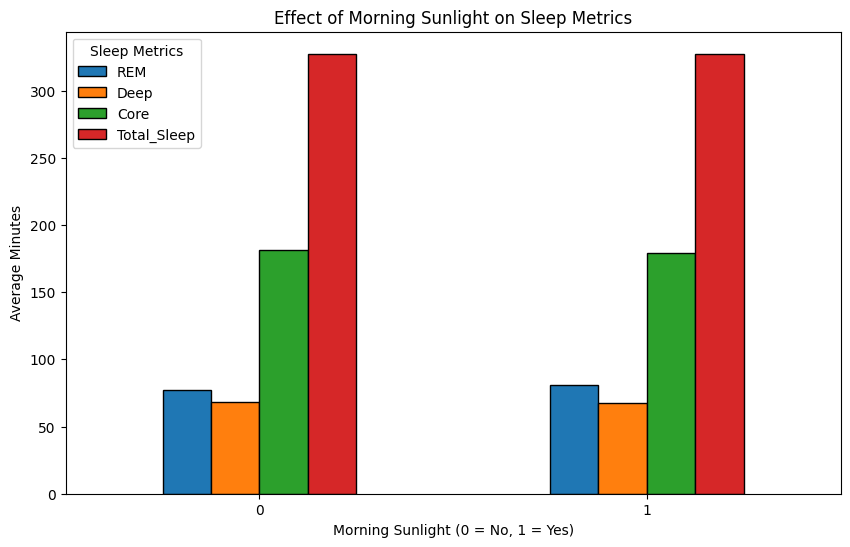

In [51]:
# Calculate average sleep metrics based on 'Morning sunlight'
merged_data['Total_Sleep'] = merged_data[['Core', 'Deep', 'REM']].sum(axis=1)
avg_sleep_sunlight = merged_data.groupby('Morning sunlight')[['REM', 'Deep', 'Core', 'Total_Sleep']].mean()

# Plot the results
avg_sleep_sunlight.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.title('Effect of Morning Sunlight on Sleep Metrics')
plt.xlabel('Morning Sunlight (0 = No, 1 = Yes)')
plt.ylabel('Average Minutes')
plt.legend(title='Sleep Metrics')
plt.xticks(rotation=0)
plt.show()

as stated earlier, no significant effect.

### Social media usage close up:

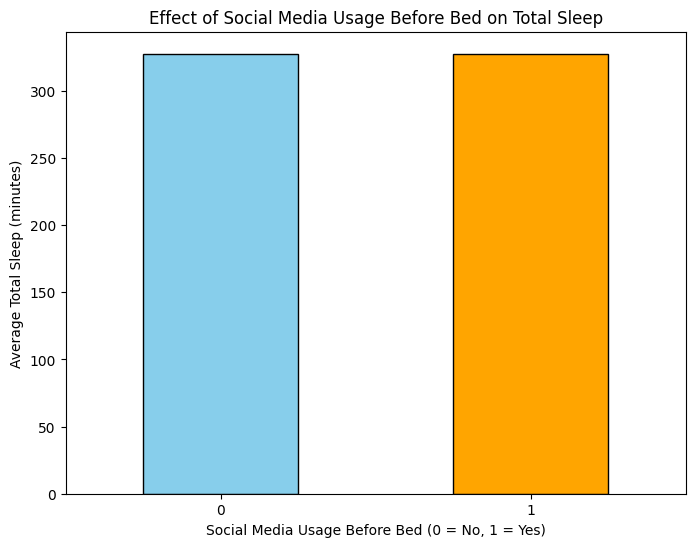

In [53]:
# Calculate average total sleep based on social media usage
avg_sleep_social_media = merged_data.groupby('Social media usage before bed')['Total_Sleep'].mean()

# Plot the results
avg_sleep_social_media.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'orange'], edgecolor='black')
plt.title('Effect of Social Media Usage Before Bed on Total Sleep')
plt.xlabel('Social Media Usage Before Bed (0 = No, 1 = Yes)')
plt.ylabel('Average Total Sleep (minutes)')
plt.xticks(rotation=0)
plt.show()

as stated earlier: no significant difference, could be due to not watching brain stimulating content and rather just watching lectures and podcasts etc.

### Exercise close up:

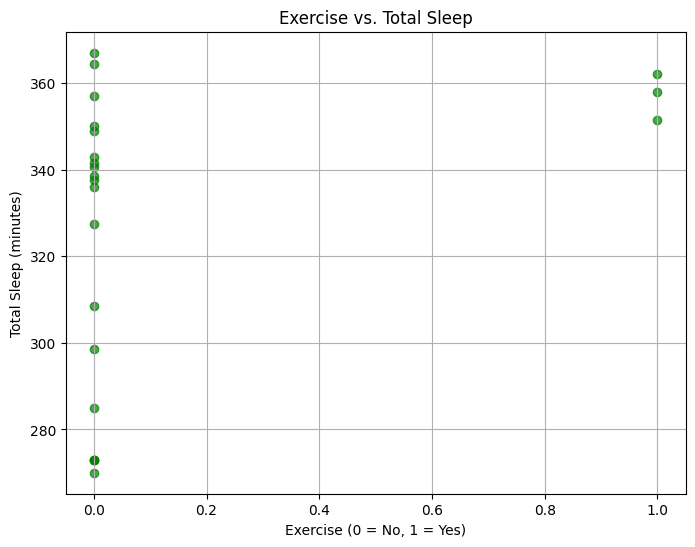

In [54]:
# Scatter plot for Exercise vs. Total Sleep
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Exercise'], merged_data['Total_Sleep'], alpha=0.7, color='green')
plt.title('Exercise vs. Total Sleep')
plt.xlabel('Exercise (0 = No, 1 = Yes)')
plt.ylabel('Total Sleep (minutes)')
plt.grid(True)
plt.show()

There is a big variation in the total duration of sleep in the dataset however the days in which I exercises I consistently slept a higher end duration of minutes. This could suggest that physical exhurtion causes the body to require longer sleep.

### Food before bed close up:

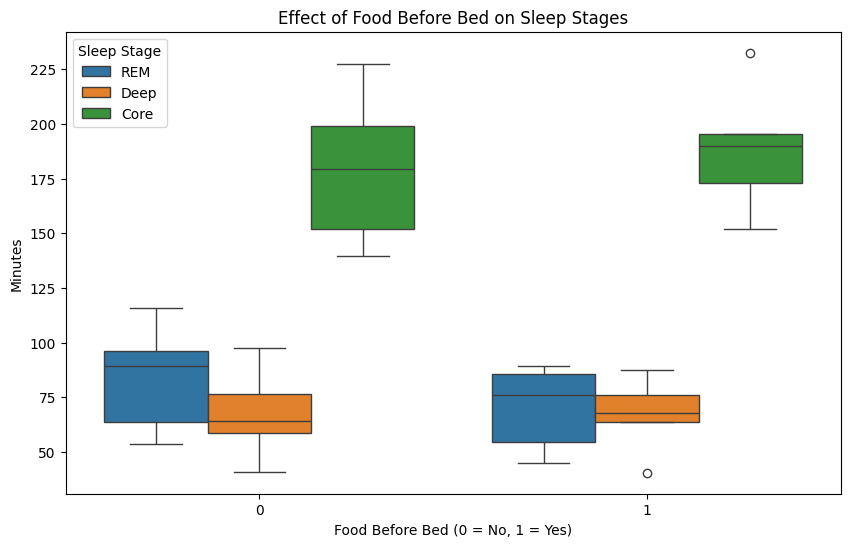

In [55]:
# Melt data for boxplot
melted_data = merged_data.melt(id_vars=['Food before bed'], 
                               value_vars=['REM', 'Deep', 'Core'], 
                               var_name='Sleep Stage', 
                               value_name='Minutes')

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Food before bed', y='Minutes', hue='Sleep Stage', data=melted_data)
plt.title('Effect of Food Before Bed on Sleep Stages')
plt.xlabel('Food Before Bed (0 = No, 1 = Yes)')
plt.ylabel('Minutes')
plt.legend(title='Sleep Stage')
plt.show()

there is a slight decrease in REM sleep as seen in the height of the box as well as teh max value.

The same was observed for Core sleep: eating before bed seems to shorten the Core sleep box.